# PWHL Skater Statistics - Visualizations

This notebook shows how to create different types of visualizations based on skater statistics.

## Objectives

**Show the code** used to create the different visualizations (bar plot, pie chart, etc.) and **find useful visualizations** to include in a future dashboard.

## Setup
Start by running `PWHL_season_skater_stats_to_csv.ipynb` to create the `skater_stats.csv` file.

Import all required libraries/packages.

In [307]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Create a dataframe.

In [310]:
df = pd.read_csv("skater_stats.csv")

Define team names, location, codes and colors.

In [313]:
teams = {"BOS": {"name": "Fleet", "location": "Boston", "code": "BOS", "color":"#173f35"},
         "MIN": {"name": "Frost", "location": "Minnesota", "code": "MIN", "color":"#251161"},
         "MTL": {"name": "Victoire", "location": "Montréal", "code": "MTL", "color":"#832434"},
         "NY": {"name": "Sirens", "location": "New York", "code": "NY", "color":"#00bcb5"},
         "OTT": {"name": "Charge", "location": "Ottawa", "code": "OTT", "color":"#a3142f"},
         "TOR": {"name": "Sceptres", "location": "Toronto", "code": "TOR", "color":"#1869b7"}}

## Visualizations

### Distribution of goals and assists

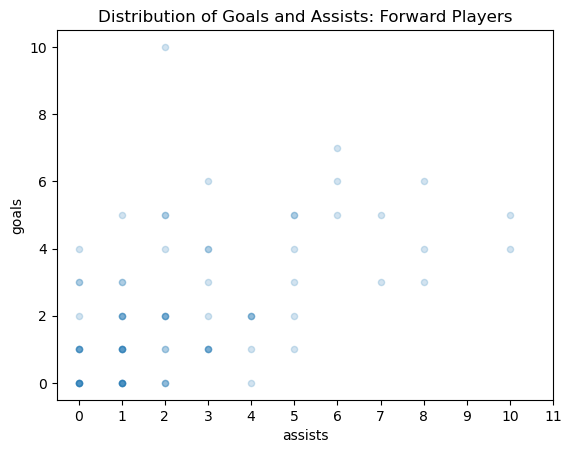

In [324]:
df[(df["position"] == "forward")].plot.scatter(x="assists", y="goals", alpha=0.2)
plt.xticks(np.arange(0, 12, 1))
plt.title("Distribution of Goals and Assists: Forward Players")
plt.show()

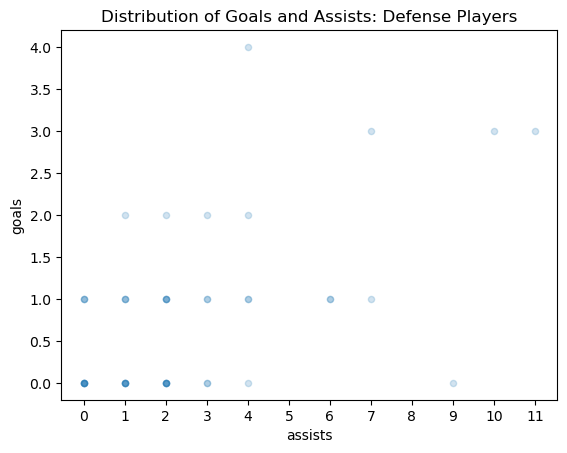

In [328]:
df[(df["position"] == "defense")].plot.scatter(x="assists", y="goals", alpha=0.2)
plt.xticks(np.arange(0, 12, 1))
plt.title("Distribution of Goals and Assists: Defense Players")
plt.show()

### Points per Rookie per Team

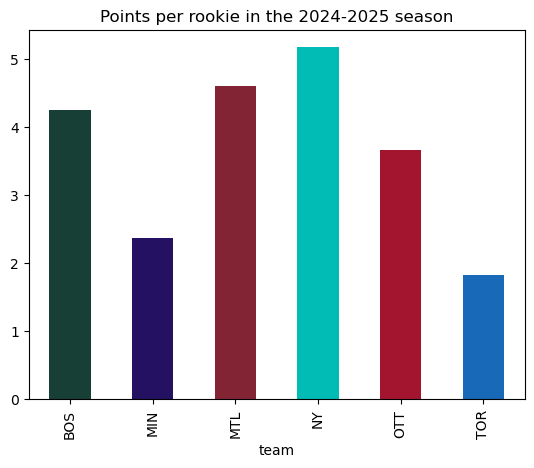

In [330]:
def points_per_rookie(df, team_code):
    rookie_points = (df[(df["status"] == "rookie") & (df["team"] == team_code)])["points"] #only keeps the rookies from the specified team
    return rookie_points.sum() / rookie_points.count() # total points divided by number of rookies

colors = []
pprookie_data = []

# creating the colors and pprookie_data lists
for team, details in teams.items():
    pprookie_data.append((team, points_per_rookie(df, team)))
    colors.append(details["color"])

# turning the pprookie_data list into a DataFrame
pprookie_df = pd.DataFrame(pprookie_data)
# naming the columns
pprookie_df.columns = ["team", "points per rookie"]
pprookie_df.plot.bar(x="team", y="points per rookie", color=colors, title="Points per rookie in the 2024-2025 season", legend=None)
plt.show()

### Relationship Between Shooting Left or Right and Points

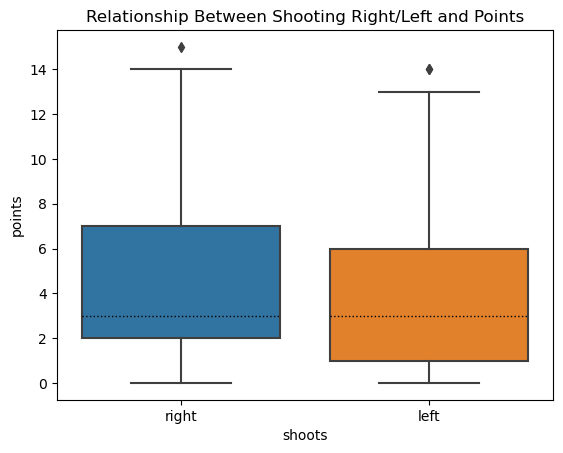

In [332]:
sns.boxplot(x = "shoots", y = "points", data=df, medianprops={'color': 'black', 'ls': ':', 'lw': 1})
plt.title("Relationship Between Shooting Right/Left and Points")
plt.show()

Note that the majority of players shoots left.

In [335]:
df["shoots"].value_counts(normalize=True) * 100

shoots
left     56.692913
right    43.307087
Name: proportion, dtype: float64

### Distribution of Top 10 Skaters Across Teams

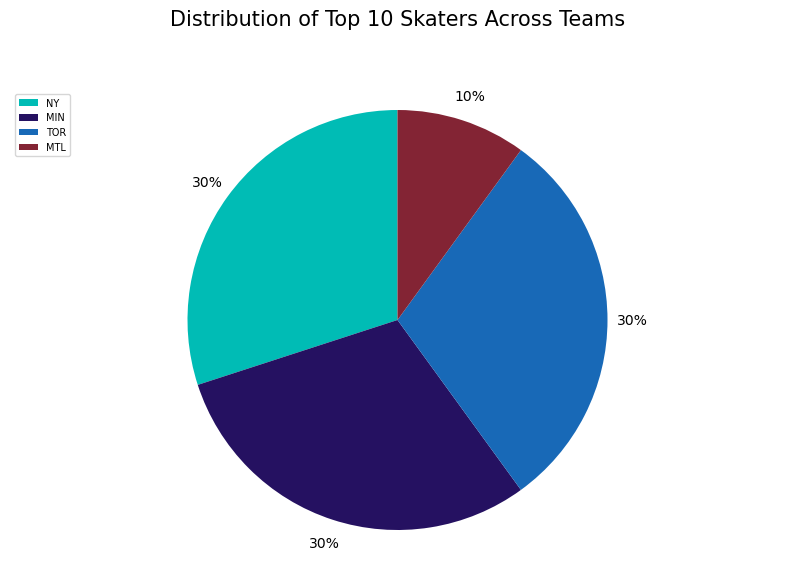

In [338]:
top10 = df.head(10)
team_df = top10["team"].value_counts().to_frame('counts')
colors_list = []
for i, row in team_df.iterrows():
    colors_list.append(teams[i]["color"])

team_df["counts"].plot(kind='pie',
             figsize=(10, 6),
             autopct='%1.f%%', 
             startangle=90,    
             shadow=False,       
             labels=None,         # turn off labels on pie chart
             ylabel='',           # remove series name on the left of the chart
             pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
             colors=colors_list)

# scale the title up by 12% to match pctdistance
plt.title('Distribution of Top 10 Skaters Across Teams', y=1.12, fontsize = 15) 

plt.axis('equal') 

# add legend
plt.legend(labels=team_df.index, loc='upper left', fontsize=7) 

plt.show()

### Distribution of Top 50 Skaters Across Teams

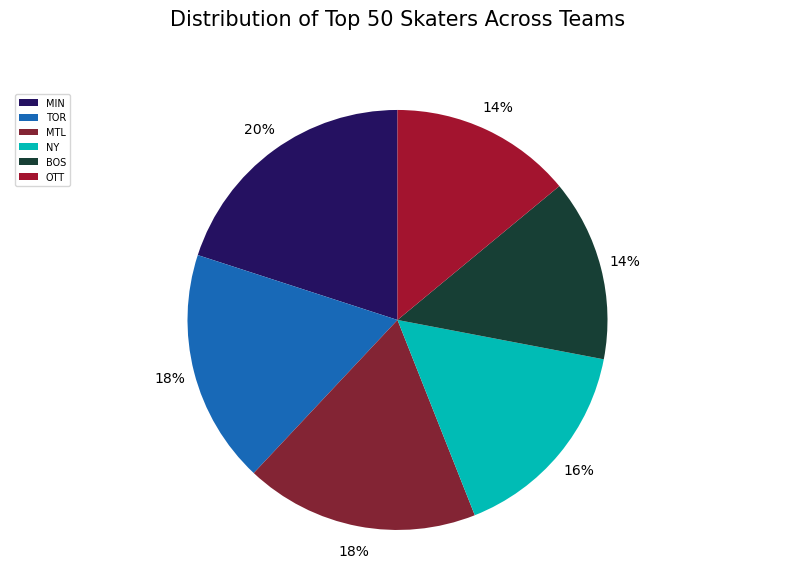

In [341]:
top50 = df.head(50)
team_df = top50["team"].value_counts().to_frame('counts')
colors_list = []
for i, row in team_df.iterrows():
    colors_list.append(teams[i]["color"])

team_df["counts"].plot(kind='pie',
             figsize=(10, 6),
             autopct='%1.f%%', 
             startangle=90,    
             shadow=False,       
             labels=None,         # turn off labels on pie chart
             ylabel='',           # remove series name on the left of the chart
             pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
             colors=colors_list)

# scale the title up by 12% to match pctdistance
plt.title('Distribution of Top 50 Skaters Across Teams', y=1.12, fontsize = 15) 

plt.axis('equal') 

# add legend
plt.legend(labels=team_df.index, loc='upper left', fontsize=7)
plt.show()

### Age Distribution

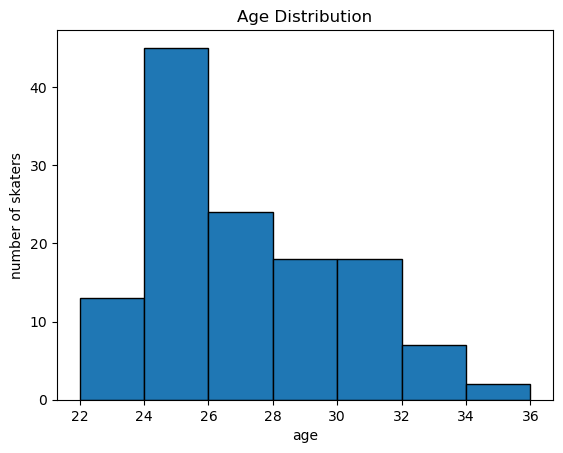

In [370]:
plt.hist(df["age"], bins=7, edgecolor='black')

# Add titles and labels
plt.title('Age Distribution')
plt.xlabel('age')
plt.ylabel('number of skaters')

# Show plot
plt.show()

### Penalty Minutes per Team

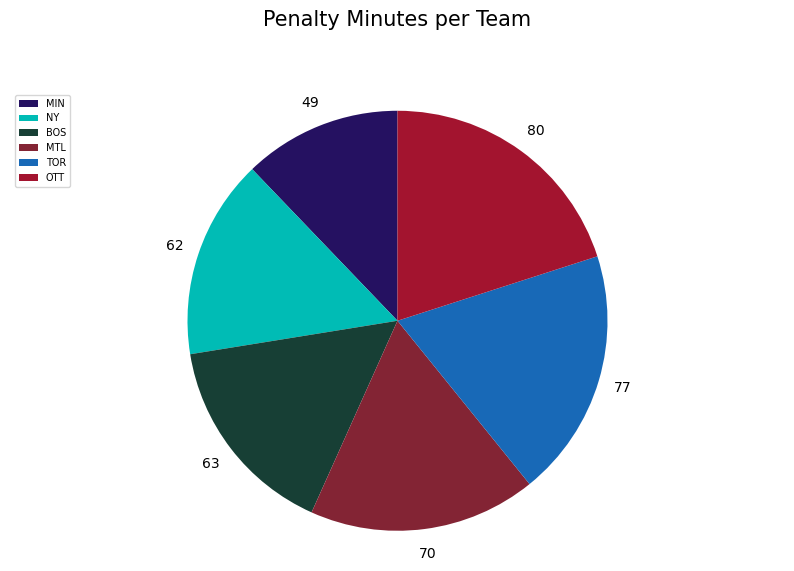

In [351]:
penalty_min = df.groupby("team")["penalty minutes"].sum().sort_values()
colors_list = []
for team in penalty_min.index:
    colors_list.append(teams[team]["color"])
penalty_min.plot(kind='pie',
             figsize=(10, 6),
             autopct= lambda x: '{:.0f}'.format(x*4),
             startangle=90,    
             shadow=False,
             labels=None,         # turn off labels on pie chart
             ylabel='',           # remove series name on the left of the chart
             pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
             colors=colors_list)

# scale the title up by 12% to match pctdistance
plt.title('Penalty Minutes per Team', y=1.12, fontsize = 15) 

plt.axis('equal') 

# add legend
plt.legend(labels=penalty_min.index, loc='upper left', fontsize=7)
plt.show()

### Goal Distribution Between Forward and Defense Players

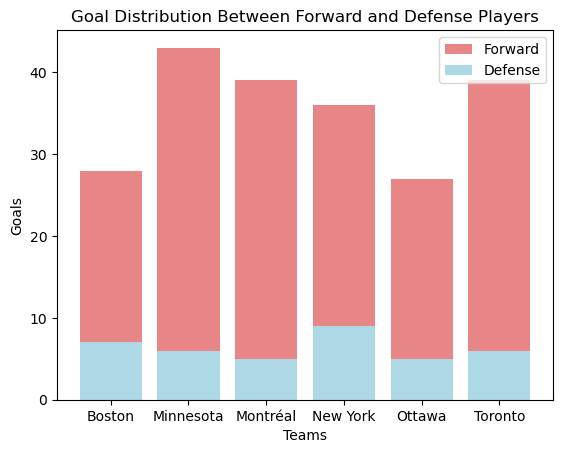

In [459]:
categories = []
subcategories = ['Defense', 'Forward']
data_list = []
colors = ["#ADD8E6", "#E78587"]

for team, details in teams.items():
    categories.append(details["location"])
    def_goals = (df[(df["position"] == "defense") & (df["team"] == team)])["goals"].sum()
    fw_goals = (df[(df["position"] == "forward") & (df["team"] == team)])["goals"].sum()
    data_list.append([def_goals, fw_goals])

data = np.array(data_list)

# Plotting
fig, ax = plt.subplots()

# Create stacked bars
for i in range(data.shape[1]):
    ax.bar(categories, data[:, i], bottom=np.sum(data[:, :i], axis=1), label=subcategories[i], color=colors[i])

# Adding labels and title
ax.set_xlabel('Teams')
ax.set_ylabel('Goals')
ax.set_title('Goal Distribution Between Forward and Defense Players')
ax.legend(reverse=True) #setting reverse to True so the higher part of each stacked bar (corresponds to the top of the legend box

# Display the chart
plt.show()

### Point Distribution Between Forward and Defense Players

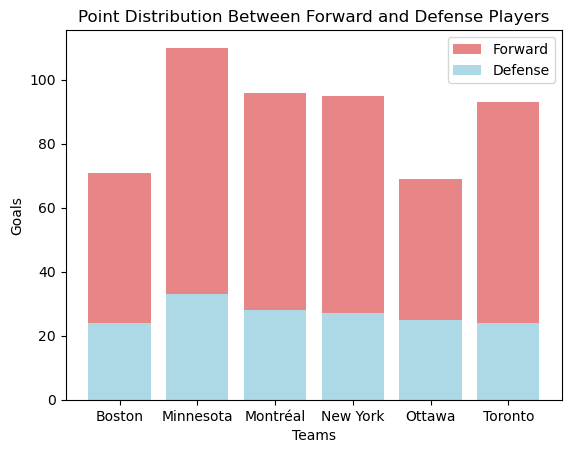

In [461]:
categories = []
subcategories = ['Defense', 'Forward']
data_list = []
colors = ["#ADD8E6", "#E78587"]

for team, details in teams.items():
    categories.append(details["location"])
    def_goals = (df[(df["position"] == "defense") & (df["team"] == team)])["points"].sum()
    fw_goals = (df[(df["position"] == "forward") & (df["team"] == team)])["points"].sum()
    data_list.append([def_goals, fw_goals])

data = np.array(data_list)

# Plotting
fig, ax = plt.subplots()

# Create stacked bars
for i in range(data.shape[1]):
    ax.bar(categories, data[:, i], bottom=np.sum(data[:, :i], axis=1), label=subcategories[i], color=colors[i])

# Adding labels and title
ax.set_xlabel('Teams')
ax.set_ylabel('Goals')
ax.set_title('Point Distribution Between Forward and Defense Players')
ax.legend(reverse=True) #setting reverse to True so the higher part of each stacked bar (corresponds to the top of the legend box

# Display the chart
plt.show()

### TODO

- See which proportion of the goals are scored by defense players, globally and for each team (stacked bar chart) (same for points)
- Average in shootouts for each team (make sure the players participated in shootouts)
- Add numbers for percentages in top 50 chart
- Choropleth map of Canada and US showing player hometowns per province/territory/state